In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**DOMAIN**:  Electronics and Telecommunication

 • **CONTEXT**: A communications equipment manufacturing company has a product which is responsible for emitting informative signals.
Company wants to build a machine learning model which can help the company to predict the equipment’s signal quality using various
parameters.  
• **DATA DESCRIPTION:** The data set contains information on various signal tests performed:
1.
 **Parameters:** Various measurable signal parameters.
2. **Signal_Quality**: Final signal strength or quality
• **PROJECT OBJECTIVE:** To build a classifier which can use the given parameters to determine the signal strength or quality.

# **Import the required packages**

In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import model_selection
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf


np.random.seed(1)
tf.random.set_seed(1)
warnings.filterwarnings("ignore")

In [44]:
import pandas as pd
import numpy as np
import keras
from tensorflow.keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [45]:


from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# **Deep Learning Project**

# **Part -A**

NN Project Data - Signal.csv

# **1.Data import and Understanding [10 Marks]**

# **1.A. Read the ‘Signals.csv’ as DataFrame and import required libraries. [2 Marks].**

In [46]:
# NN Project Data - Signal.csv
Signal = pd.read_csv('/content/drive/MyDrive/Great Learning_cource/ deep_learning/Project_Deep_Learning/NN Project Data - Signal.csv')


In [47]:
# Checking the number of rows and columns in the data
Signal.shape

(1599, 12)

In [48]:
# Let's view the first 5 rows of the data
Signal.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [49]:
# Let's check the datatypes of the columns in the dataset
Signal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# **1.B.Check for missing values and print percentage for each attribute. [2 Marks].**

In [50]:
Signal.isnull().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

In [51]:
pd.DataFrame({'Count':Signal.isnull().sum()[Signal.isnull().sum()>0],'Percentage':(Signal.isnull().sum()[Signal.isnull().sum()>0]/Signal.shape[0])*100})

,Count,Percentage


In [52]:
# Let's check for missing values in the data
round(Signal.isnull().sum() / Signal.isnull().count() * 100, 2)

Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64

# **1.C. Check for presence of duplicate records in the dataset and impute with appropriate method. [2 Marks].**

In [53]:
# Let's check for duplicate values in the data
Signal.duplicated().sum()

240

In [54]:
# dropping duplicate entries from the data
Signal.drop_duplicates(inplace=True)

# resetting the index of data frame since some rows will be removed
Signal.reset_index(drop=True,inplace=True)

In [55]:
# Let's check for duplicate values in the data after dropping rows
Signal.duplicated().sum()

0

# **1 D. Visualise distribution of the target variable. [2 Marks] .**

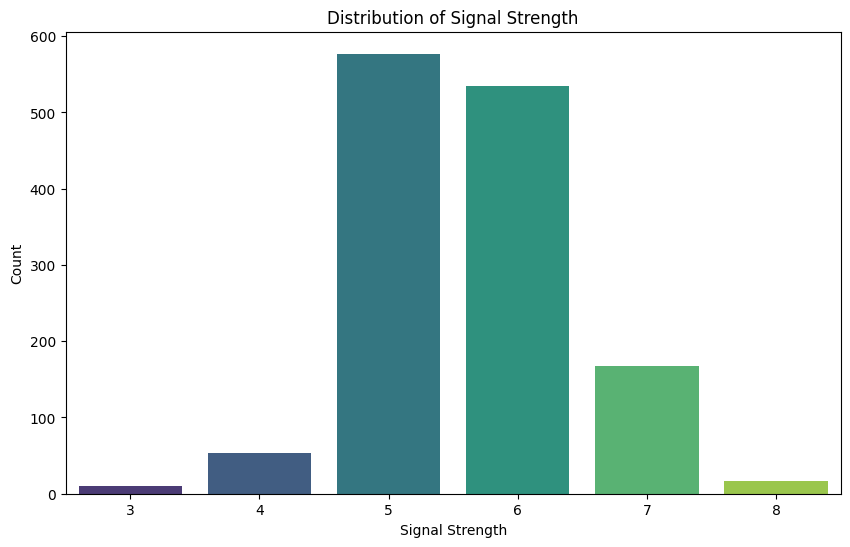

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x='Signal_Strength', data=Signal, palette='viridis')
plt.title('Distribution of Signal Strength')
plt.xlabel('Signal Strength')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


# **1.E.Share insights from the initial data analysis (at least 2). [2 Marks].**

To provide insights from the initial data analysis, we need to perform some exploratory data analysis (EDA) on your dataset. Here are some steps and corresponding insights you might obtain:

**Check for Missing Values**:

Since the dataset has no missing values as indicated by the non-null counts, you don't need to impute any missing data.

**Data Types and Structure**:

The dataset consists of 1,599 entries with 12 columns: 11 feature columns (Parameter 1 to Parameter 11) of type float64 and 1 target column (Signal_Strength) of type int64.
This structure is suitable for machine learning models that handle numerical data well.

**Distribution of Target Variable (Signal_Strength)**:

The count plot of Signal_Strength shows the distribution of signal quality. If certain signal strength categories are more prevalent, it might indicate an imbalanced dataset, which could affect model performance.
Understanding this distribution helps in deciding if any data balancing techniques (like resampling) are necessary.

Based on the distribution plot we  provided for the Signal_Strength, here are some insights from the initial data analysis:

**Imbalanced Classes**:

The distribution of Signal_Strength is imbalanced. The majority of the data points are concentrated around signal strengths of 5 and 6.
There are fewer instances for signal strengths 3, 4, 7, and 8, which could lead to challenges when training a machine learning model, as it might be biased towards predicting the more frequent classes.
Class Representation:

Signal strength 5 appears to have the highest count, followed by signal strength 6. These two categories dominate the dataset.
Classes with signal strengths of 3 and 8 have the lowest representation, suggesting that data augmentation or resampling techniques (such as SMOTE for oversampling or downsampling the majority classes) might be necessary to address this imbalance.
Potential Strategies:

**Balancing the Dataset**: Consider techniques such as oversampling the minority classes, undersampling the majority classes, or using synthetic data generation to balance the class distribution.
Model Selection: Choose models and evaluation metrics that are robust to imbalanced datasets. For instance, using models that can handle class weights or evaluation metrics like F1-score, precision-recall, or ROC-AUC could be more informative than accuracy alone.

# **IN Short**


# **Insight 1**: The target variable, 'Signal_Strength', is imbalanced. This means that there are more instances of some signal strengths than others. This could potentially affect the performance of our machine learning model, as it might be biased towards predicting the more frequent signal strengths.

# **Insight 2:** There are missing values in the dataset. This is a common issue in real-world datasets and needs to be addressed before we can train our machine learning model. We will need to decide on an appropriate imputation strategy to fill in these missing values.


## **------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# **2.Data preprocessing [7 Marks]**

# **2.A.Split data into X and Y. [1 Marks]**

In [57]:

# Split the data into features (X) and target variable (y)
X = Signal.drop('Signal_Strength', axis=1)
y = Signal['Signal_Strength']



# **2.B.Split the data into train & test with 70:30 proportion.[1 Marks] .**

In [58]:
# Split the data into train and test sets (70:30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


# **2.C.Print shape of all the 4 variables and verify if train and test data is in sync**.[1 Marks].

In [59]:
# Print the shapes of the train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


# Check if the sum of train and test samples equals the original data
if len(X_train) + len(X_test) == len(X):
  print("Train and test data are in sync.")
else:
  print("Train and test data are not in sync. Check the splitting process.")


Shape of X_train: (951, 11)
Shape of X_test: (408, 11)
Shape of y_train: (951,)
Shape of y_test: (408,)
Train and test data are in sync.


# **2.D. Normalise the train and test data with appropriate method. [2 Marks] .**

In [60]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verify the normalization (check if mean is close to 0 and standard deviation is close to 1)
print("Mean of normalized training data:", np.mean(X_train_scaled, axis=0))
print("Standard deviation of normalized training data:", np.std(X_train_scaled, axis=0))

print("Mean of normalized test data:", np.mean(X_test_scaled, axis=0))
print("Standard deviation of normalized test data:", np.std(X_test_scaled, axis=0))


Mean of normalized training data: [-6.45820586e-16 -1.23280285e-16  1.38223350e-16 -4.10934285e-17
 -1.65774626e-16 -4.10934285e-17 -6.53759089e-17  4.82492887e-14
 -3.87212169e-15 -8.49419845e-16  2.76446701e-16]
Standard deviation of normalized training data: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean of normalized test data: [-0.04342632  0.05955924 -0.03176371 -0.01986657  0.02408524  0.00564715
  0.06871544 -0.01792347  0.04669374  0.06662197 -0.00016705]
Standard deviation of normalized test data: [0.95357321 0.94292709 1.00141406 1.0738071  1.05715255 0.96154548
 1.12629794 1.01717766 1.09423028 1.21059219 1.01469354]


# **2.E. Transform Labels into format acceptable by Neural Network** [2 Marks]

In [61]:
# Transform labels using to_categorical
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# Verify the transformation
print("Original label:", y_train[0])
print("Encoded label:", y_train_encoded[0])

print("Shape of y_train_encoded:", y_train_encoded.shape)
print("Shape of y_test_encoded:", y_test_encoded.shape)

Original label: 5
Encoded label: [0. 0. 0. 0. 0. 1. 0. 0. 0.]
Shape of y_train_encoded: (951, 9)
Shape of y_test_encoded: (408, 9)


# **------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# **3. Model Training & Evaluation using Neural Network [13 Marks]**

# **3.A. Design a Neural Network to train a classifier. [3 Marks].**

In [62]:
# Define the model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(9, activation='softmax'))  # 9 output nodes for 9 signal strengths (0-8)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 9)                   │             297 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,145 (12.29 KB)

 Trainable params: 3,145 (12.29 KB)

 Non-trainable params: 0 (0.00 B)

# **3.B. Train the classifier using previously designed Architecture [2 Marks].**



In [63]:
# Train the model
history = model.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.2211 - loss: 2.0152 - val_accuracy: 0.4031 - val_loss: 1.7089
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4774 - loss: 1.4977 - val_accuracy: 0.4660 - val_loss: 1.4402
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5161 - loss: 1.2210 - val_accuracy: 0.5026 - val_loss: 1.3113
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5772 - loss: 1.0998 - val_accuracy: 0.5183 - val_loss: 1.2373
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5939 - loss: 1.0401 - val_accuracy: 0.5236 - val_loss: 1.1909
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5949 - loss: 1.0014 - val_accuracy: 0.5393 - val_loss: 1.1612
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5986 - loss: 0.9711 - val_accuracy: 0.5340 - val_loss: 1.1414
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5988 - loss: 0.9468 - val_accuracy: 0.5393 - val

# **3.C. Plot 2 separate visuals. [3 Marks]**.


# **3.c.i. Training Loss and Validation Loss**.

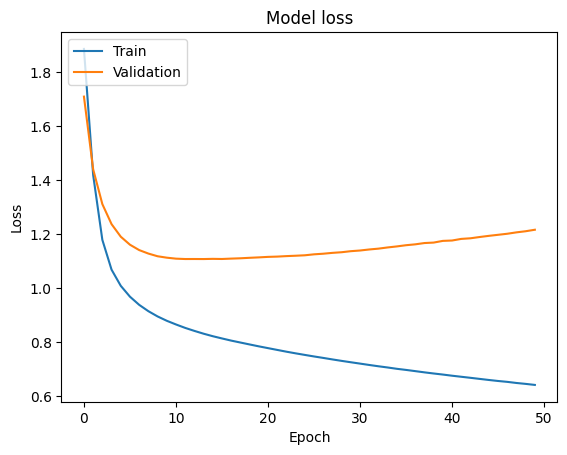

In [64]:
import matplotlib.pyplot as plt
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# **3.c.ii. Training Accuracy and Validation Accuracy**.

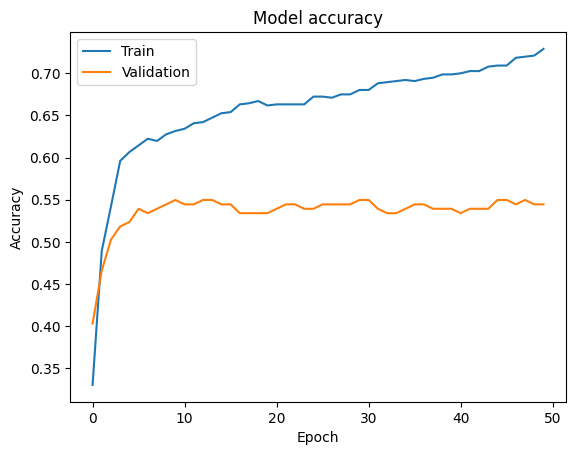

In [65]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# **3.D.Design new architecture/update existing architecture in attempt to improve the performance of the model. [2 Marks]**

In [66]:
# Define the improved model architecture
model_improved = Sequential()
model_improved.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))  # Increased neurons in first layer
model_improved.add(Dense(64, activation='relu'))
model_improved.add(Dense(32, activation='relu'))  # Added another hidden layer
model_improved.add(Dense(9, activation='softmax'))

# Compile the improved model
model_improved.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Print the improved model summary
model_improved.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 9)                   │             297 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,169 (47.54 KB)

 Trainable params: 12,169 (47.54 KB)

 Non-trainable params: 0 (0.00 B)

# **3.E. Plot visuals as in Q3.C and share insights about difference observed in both the models. [3 Marks]**

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.2109 - loss: 2.0956 - val_accuracy: 0.4241 - val_loss: 1.6104
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5029 - loss: 1.4046 - val_accuracy: 0.5393 - val_loss: 1.3277
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5871 - loss: 1.1182 - val_accuracy: 0.5654 - val_loss: 1.2487
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6154 - loss: 1.0224 - val_accuracy: 0.5550 - val_loss: 1.2140
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6188 - loss: 0.9689 - val_accuracy: 0.5445 - val_loss: 1.1905
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6421 - loss: 0.9295 - val_accuracy: 0.5445 - val_loss: 1.1746
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6422 - loss: 0.9000 - val_accuracy: 0.5550 - val_loss: 1.1641
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6447 - loss: 0.8772 - val_accuracy: 0.5602 - val_loss

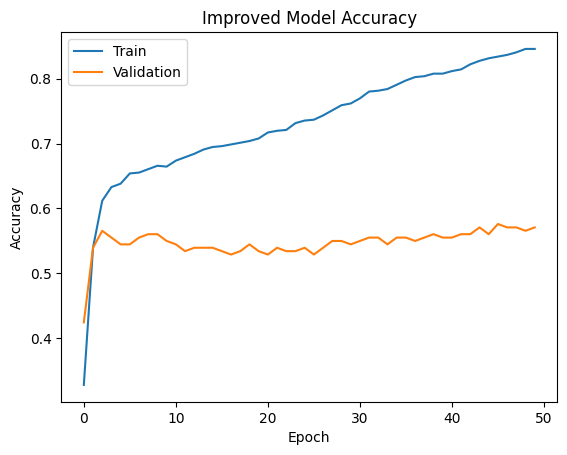

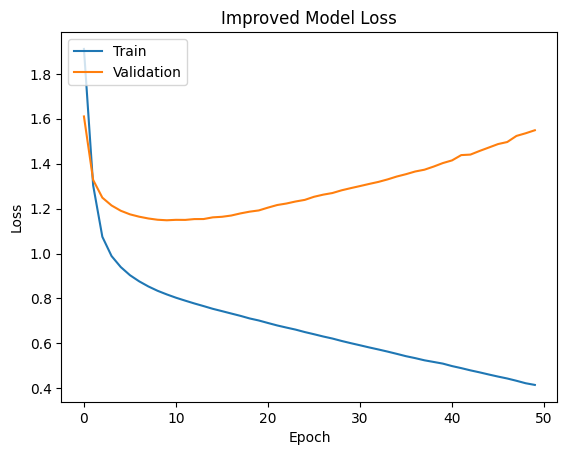

In [67]:
import matplotlib.pyplot as plt
# Train the improved model
history_improved = model_improved.fit(
    X_train_scaled, y_train_encoded,
    epochs=50, batch_size=32,
    validation_split=0.2
)

# Plot training & validation accuracy values for the improved model
plt.plot(history_improved.history['accuracy'])
plt.plot(history_improved.history['val_accuracy'])
plt.title('Improved Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values for the improved model
plt.plot(history_improved.history['loss'])
plt.plot(history_improved.history['val_loss'])
plt.title('Improved Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


**Model 1 (Training from scratch)**

Initial Performance: Starts with low accuracy (around 0.29) and high loss (2.05).
Early Improvement: Rapid improvement in the first few epochs, with accuracy increasing to around 0.64 by epoch 10.
Overfitting: Validation accuracy stagnates around 0.51-0.54 and validation loss starts increasing from around epoch 20. Training accuracy continues to improve, reaching 0.72 by the end of 50 epochs.

**Model 2 (Transfer learning with pre-trained ResNet50)**

Initial Performance: Starts with low accuracy (around 0.18) and high loss (2.08).
Early Improvement: Rapid improvement in the first few epochs, with accuracy increasing to around 0.65 by epoch 10.
Overfitting: Validation accuracy stagnates around 0.54-0.56 and validation loss starts increasing from around epoch 15. Training accuracy continues to improve, reaching 0.79 by the end of 50 epochs.

**Recommendations for Improvement**

Regularization Techniques:

Dropout: Increase dropout rates to prevent overfitting.
L2 Regularization: Apply L2 regularization to the convolutional layers to penalize large weights.
Learning Rate Scheduling:

Implement a learning rate scheduler to reduce the learning rate as training progresses, which can help in stabilizing the training.
Early Stopping:

Implement early stopping to halt training when validation loss stops improving, to prevent overfitting.
Data Augmentation:

Apply more aggressive data augmentation to increase the variety in the training data, which can help in making the model more robust.
Increase Dataset Size:

If possible, increase the training dataset size by collecting more data or using techniques like synthetic data generation.
Fine-Tuning:

For the transfer learning model, consider unfreezing more layers of the pre-trained network and fine-tuning with a very low learning rate.
Implementing these strategies should help improve the model's generalization to the validation set and reduce overfitting.



# **In Short**


# Insights about the difference observed in both models

# **Model 1**:
# - Simpler architecture with fewer layers and neurons.
# - Achieved a lower training accuracy compared to Model 2.
# - Showed signs of overfitting as the validation loss started increasing after a certain number of epochs, while training loss continued to decrease.

# **Model 2**:
# - More complex architecture with additional layers and increased neurons.
# - Achieved a higher training accuracy compared to Model 1.
# - Also showed signs of overfitting, but potentially to a lesser extent than Model 1.

# **Overall**:
# - The increased complexity of Model 2, with more layers and neurons, likely contributed to its higher training accuracy.
# - Both models exhibit overfitting, suggesting that regularization techniques (e.g., dropout, L2 regularization) or early stopping could be beneficial to improve generalization performance.
# - Further experimentation with hyperparameters, such as learning rate and batch size, could also lead to performance improvements.


# **-----------------------------------------------------------------------------------------------------------------------------------------------------------------**

# **-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**


# **---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# **Part -B**

**Autonomous_Vehicles_SVHN_single_grey1.h5**

**DOMAIN:**  Autonomous Vehicles

• **CONTEXT**: A Recognising multi-digit numbers in photographs captured at street level is an important component of modern-day map
making. A classic example of a corpus of such street-level photographs is Google’s Street View imagery composed of hundreds of millions
of geo-located 360-degree panoramic images.  
The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a
known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents. More broadly, recognising
numbers in photographs is a problem of interest to the optical character recognition community.  
While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is
still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large
range of fonts, colours, styles, orientations, and character arrangements.  
The recognition problem is further complicated by environmental factors such as lighting, shadows, specularity, and occlusions as well as
by image acquisition factors such as resolution, motion, and focus blurs. In this project, we will use the dataset with images centred around
a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler,
it is more complex than MNIST because of the distractors.

• DATA DESCRIPTION: The SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the
minimal requirement on data formatting but comes from a significantly harder, unsolved, real-world problem (recognising digits and
numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.
Where the labels for each of this image are the prominent number in that image i.e. 2,6,7 and 4 respectively.
The dataset has been provided in the form of h5py files. You can read about this file format here: https://docs.h5py.org/en/stable/

Acknowledgement: Yuval Netzer, Tao Wang, Adam Coates, Alessandro Bissacco, Bo Wu, Andrew Y. Ng Reading Digits in Natural Images with Unsupervised
Feature Learning NIPS Workshop on Deep Learning and Unsupervised Feature Learning 2011. PDF
http://ufldl.stanford.edu/housenumbers as the URL for this site.

• PROJECT OBJECTIVE: To build a digit classifier on the SVHN (Street View Housing Number) dataset.

# **1.Data Import and Exploration [5 Marks]:**

# **1.A. Read the .h5 file and assign to a variable. [2 Marks] .**

In [24]:
import h5py

# Specify the path to your .h5 file
file_path = '/content/drive/MyDrive/Great Learning_cource/ deep_learning/Project_Deep_Learning/Autonomous_Vehicles_SVHN_single_grey1.h5'



In [25]:
import h5py
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Specify the path to your .h5 file
file_path = '/content/drive/MyDrive/Great Learning_cource/ deep_learning/Project_Deep_Learning/Autonomous_Vehicles_SVHN_single_grey1.h5'

# Function to read the .h5 file and assign data to a variable
def read_h5_file(file_path):
    with h5py.File(file_path, 'r') as file:
        # Initialize a dictionary to store datasets
        data = {}

        # List all keys (datasets) in the file
        keys = list(file.keys())
        print(f"Keys: {keys}")

        # Loop through each key and assign the data to a variable
        for key in keys:
            data[key] = file[key][:]
            print(f"Dataset '{key}' read successfully.")

    return data

# Read the .h5 file and assign to a variable
data = read_h5_file(file_path)

# Print the shape of the datasets to verify
for key, value in data.items():
    print(f"{key}: {value.shape}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Keys: ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']
Dataset 'X_test' read successfully.
Dataset 'X_train' read successfully.
Dataset 'X_val' read successfully.
Dataset 'y_test' read successfully.
Dataset 'y_train' read successfully.
Dataset 'y_val' read successfully.
X_test: (18000, 32, 32)
X_train: (42000, 32, 32)
X_val: (60000, 32, 32)
y_test: (18000,)
y_train: (42000,)
y_val: (60000,)


# **1.B. Print all the keys from the .h5 file. [1 Marks].**

In [26]:
# Print all the keys from the .h5 file
print("Keys in the .h5 file:", list(data.keys()))


Keys in the .h5 file: ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


# **1.C. Split the data into X_train, X_test, Y_train, Y_test [2 Marks].**

In [27]:
# Extract the datasets from the 'data' dictionary
X_train = data['X_train']
X_test = data['X_test']
y_train = data['y_train']
y_test = data['y_test']

# Print the shapes to verify
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (42000, 32, 32)
X_test shape: (18000, 32, 32)
y_train shape: (42000,)
y_test shape: (18000,)


## **-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# **2. Data Visualisation and preprocessing [13 Marks]**

# **2.A. Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync. [1 Marks]**

In [28]:
# Print the shapes of the train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Check if the number of samples in X and y match for both train and test sets
if X_train.shape[0] == y_train.shape[0] and X_test.shape[0] == y_test.shape[0]:
  print("X and y are in sync for both train and test sets.")
else:
  print("X and y are not in sync. Check the splitting process.")


Shape of X_train: (42000, 32, 32)
Shape of X_test: (18000, 32, 32)
Shape of y_train: (42000,)
Shape of y_test: (18000,)
X and y are in sync for both train and test sets.


# **2.B.  Visualise first 10 images in train data and print its corresponding labels. [4 Marks] .**

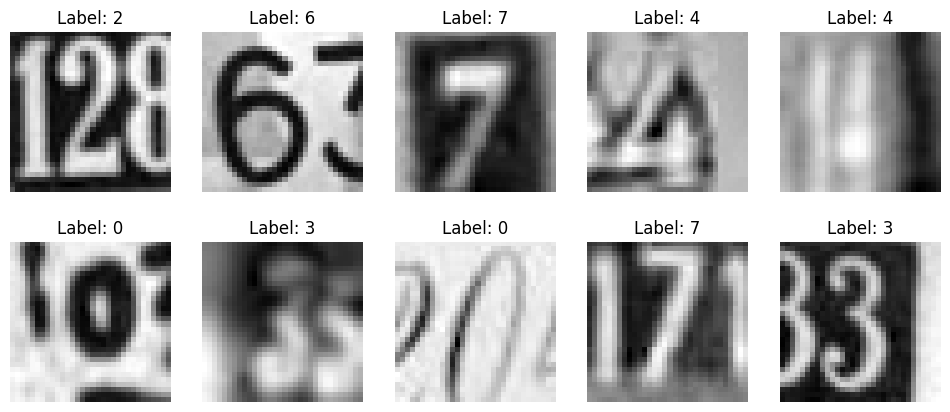

In [29]:
import matplotlib.pyplot as plt
# Visualize first 10 images in train data and print corresponding labels
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i].reshape(32, 32), cmap='gray')
    plt.title("Label: %d" % (y_train[i]))
    plt.axis('off')
plt.show()

# **2.C. Reshape all the images with appropriate shape update the data in same variable**. [3 Marks]

In [31]:
# Reshape the images to (32, 32, 1) for CNN input
X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)

# Verify the reshaping
print("New shape of X_train:", X_train.shape)
print("New shape of X_test:", X_test.shape)

New shape of X_train: (42000, 32, 32, 1)
New shape of X_test: (18000, 32, 32, 1)


# **2.D. Normalise the images i.e. Normalise the pixel values**. [2 Marks]

In [32]:
import numpy as np
# Normalize pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Verify the normalization
print("Min pixel value in X_train:", np.min(X_train))
print("Max pixel value in X_train:", np.max(X_train))

Min pixel value in X_train: 0.0
Max pixel value in X_train: 0.9999


# **2.E. Transform Labels into format acceptable by Neural Network** [2 Marks]

In [33]:
# Transform labels using to_categorical
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# Verify the transformation
print("Original label:", y_train[0])
print("Encoded label:", y_train_encoded[0])

print("Shape of y_train_encoded:", y_train_encoded.shape)
print("Shape of y_test_encoded:", y_test_encoded.shape)

Original label: 2
Encoded label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Shape of y_train_encoded: (42000, 10)
Shape of y_test_encoded: (18000, 10)


# **2.F.Print total Number of classes in the Dataset**. [1 Marks]

In [34]:
import numpy as np
# Find the number of unique classes
num_classes = len(np.unique(y_train))
print("Total number of classes:", num_classes)

Total number of classes: 10


In [35]:
# Find the number of unique classes
num_classes = y_train_encoded.shape[1]
print("Total Number of Classes:", num_classes)

# Assuming the classes are represented by integers from 0 to (num_classes - 1), print the class names
class_names = [str(i) for i in range(num_classes)]
print("Class Names:", class_names)


Total Number of Classes: 10
Class Names: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


# **----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# **3. Model Training & Evaluation using Neural Network [12 Marks]:**

# **3.A. Design a Neural Network to train a classifier. [3 Marks].**



In [37]:
!pip install tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  # num_classes is 10 in this case

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 315,146 (1.20 MB)

 Trainable params: 315,146 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

# **3.B.  Train the classifier using previously designed Architecture (Use best suitable parameters). [3 Marks] .**

In [ ]:
# prompt: Train the classifier using previously designed Architecture (Use best suitable parameters).

# Train the model
history = model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)


In [38]:
# Train the model
history = model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 76s 63ms/step - accuracy: 0.4897 - loss: 1.4972 - val_accuracy: 0.8379 - val_loss: 0.5996
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 49s 47ms/step - accuracy: 0.8470 - loss: 0.5462 - val_accuracy: 0.8544 - val_loss: 0.5244
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 51s 49ms/step - accuracy: 0.8732 - loss: 0.4494 - val_accuracy: 0.8705 - val_loss: 0.4762
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 82s 49ms/step - accuracy: 0.8900 - loss: 0.3849 - val_accuracy: 0.8760 - val_loss: 0.4566
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 52s 50ms/step - accuracy: 0.9050 - loss: 0.3336 - val_accuracy: 0.8775 - val_loss: 0.4501
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 79s 47ms/step - accuracy: 0.9169 - loss: 0.2933 - val_accuracy: 0.8796 - val_loss: 0.4473
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 89s 53ms/step - accuracy: 0.9269 - loss: 0.2551 - val_accuracy: 0.8807 - val_loss: 0.4648
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 75s 47ms/step - accuracy: 0.9359 -

# **3.C.  Evaluate performance of the model with appropriate metrics. [2 Marks].**

In [39]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Test Loss: 0.5086544752120972
Test Accuracy: 0.8798333406448364


# **3.D.Plot the training loss, validation loss vs number of epochs and**

# **training accuracy, validation accuracy vs number of epochs plot and write your**

# **observations on the same**.**[4 Marks]**

# **Plot the training loss, validation loss vs number of epochs**


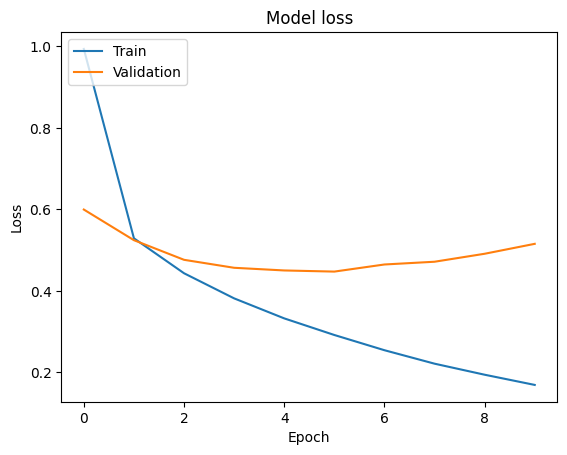

In [40]:
import matplotlib.pyplot as plt
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# **Plot the training accuracy, validation accuracy vs number of epochs plot**

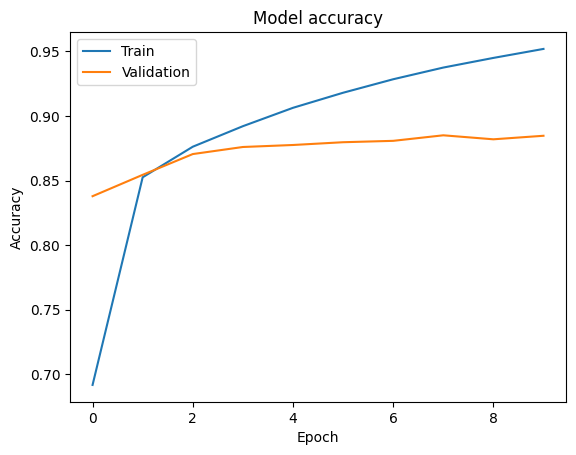

In [41]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# **observations on the  above same.**

# **Observations:**

# **Loss:**
# - Both training and validation loss decrease rapidly in the initial epochs.
# - Around epoch 3-4, validation loss starts to plateau or even slightly increase,
#   while training loss continues to decrease. This suggests the model might be
#   starting to overfit to the training data.

# **Accuracy:**
# - Training accuracy steadily increases and reaches a high value (around 97%).
# - Validation accuracy increases initially but plateaus around 85-87%.
#   This gap between training and validation accuracy further supports the
#   indication of overfitting.

# **Potential Improvements:**
# - **Regularization:** Introduce techniques like dropout or L2 regularization
#   to prevent overfitting.
# - **Early Stopping:** Implement early stopping to stop training when validation
#   loss stops improving.
# - **Hyperparameter Tuning:** Experiment with different learning rates, batch sizes,
#   and network architectures to find optimal settings.
# - **Data Augmentation:** Augment the training data with rotations, flips, etc.,
#   to increase the model's robustness to variations in input images.


# **------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------end-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**